In [ ]:
import csv
import time
import pandas as pd
import string

from nltk.corpus import stopwords

import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='Dark2')

import re
from collections import Counter
from string import punctuation

from wordcloud import WordCloud

from textblob import TextBlob

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## Analysis of Reddit Posts

In [ ]:
col_names=["index","keyword",'Post','Score','Comments','link','domain','url','postid','subreddit','Date']

df = pd.read_csv('/content/drive/MyDrive/QTDL/Report/Sentiment-Analysis-using-Pyspark-on-Multi-Social-Media-Data/newdata.csv', names=col_names)

#df.head()
print(len(df))

3425


In [ ]:
df = df.drop_duplicates('postid')
df.shape

(2114, 11)

In [ ]:
df = df.filter(['Post','Score','Comments','Date'], axis=1)
df.head()

,Post,Score,Comments,Date
0,[R] Megathread II: India-Pakistan Border Skirmish,394,5408,02-27-2019
1,Trump used accent to imitate India's prime min...,26074,3631,01-22-2018
2,Indian Prime Minister Narendra Modi told Germa...,58611,3242,05-31-2017
3,[R] Megathread III: India-Pakistan Border Skir...,218,2734,03-01-2019
4,Modi: From Nov 8 to abolish 500 and 1000 Rupee...,2917,1744,11-08-2016


In [ ]:
#extract the tweet with more FAVs and more RTs:

fav_max = np.max(df['Score'])
rt_max = np.max(df['Comments'])
#print(fav_max)

fav = df[df.Score == fav_max].index[0]
rt = df[df.Comments == rt_max].index[0]

#print(fav)

# Max FAVs:
print("\nThe tweet with more likes is: \n{}".format(df['Post'][fav]))
print("Number of likes: {}".format(fav_max))
#print("{} characters.\n".format(data['len'][fav]))

# Max RTs:
print("\nThe tweet with more retweets is: \n{}".format(df['Post'][rt]))
print("Number of retweets: {}".format(rt_max))
#print("{} characters.\n".format(data['len'][rt]))


The tweet with more likes is: 
Indian Prime Minister Narendra Modi told German Chancellor Angela Merkel in talks in Berlin on Tuesday that India would stay in the Paris climate accord even if the United States pulled out
Number of likes: 58611

The tweet with more retweets is: 
[R] Megathread II: India-Pakistan Border Skirmish
Number of retweets: 5408


<Axes: xlabel='Date'>

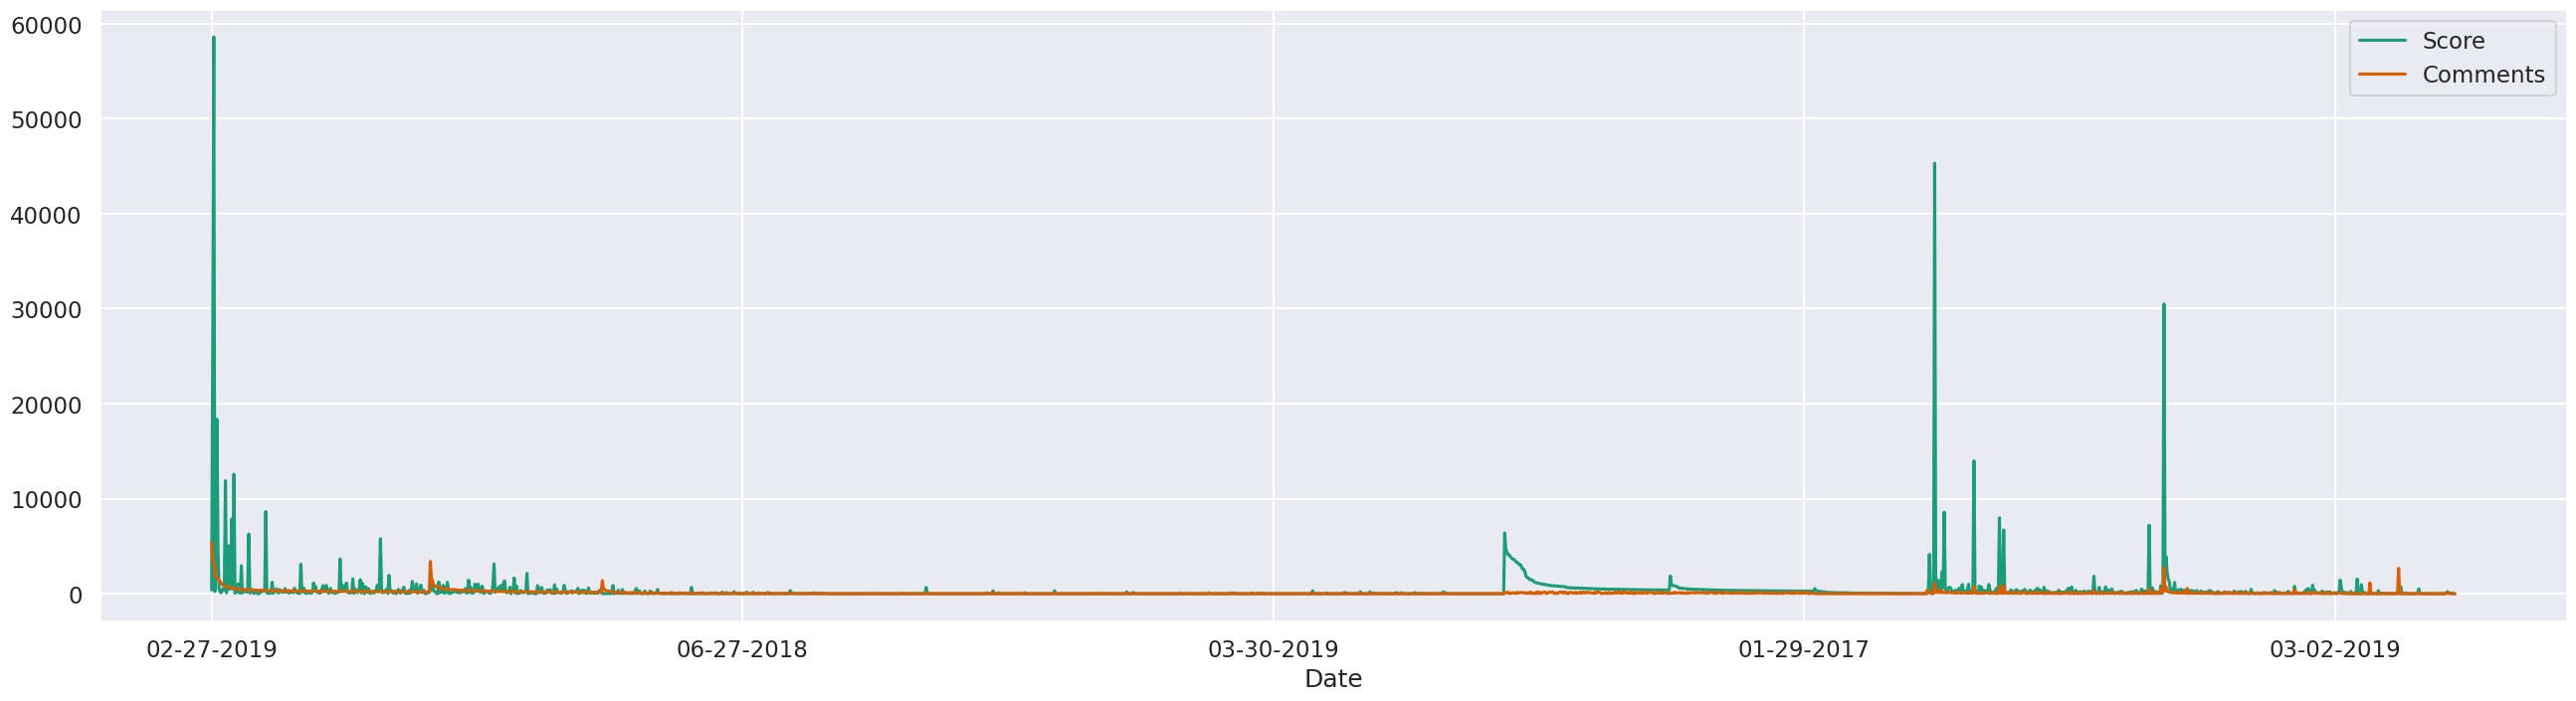

In [ ]:
# Create time series for the data:

#tlen = pd.Series(data=data['len'].values, index=data['Date'])
tfav = pd.Series(data=df['Score'].values, index=df['Date'])
tret = pd.Series(data=df['Comments'].values, index=df['Date'])

# Likes vs retweets visualization:
tfav.plot(figsize=(32,8), label="Score", legend=True)
tret.plot(figsize=(32,8), label="Comments", legend=True)

In [ ]:
df['Score'].corr(df['Comments'])

0.48313614932545496

<Axes: xlabel='Score', ylabel='Comments'>

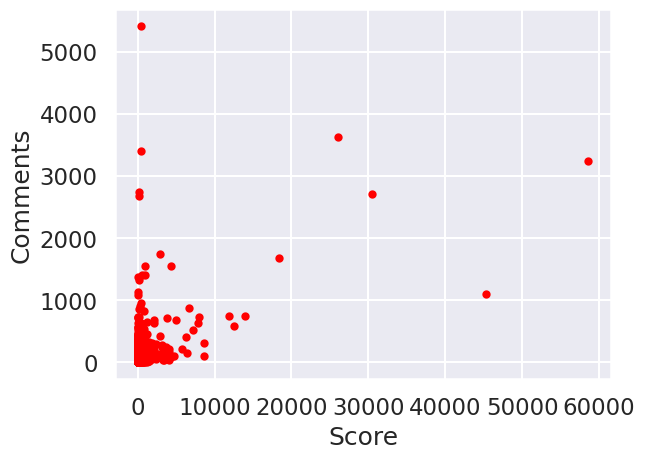

In [ ]:
df.plot.scatter(x='Score',y='Comments',c='r')

## Analysis of Reddit Comments

In [ ]:
col_names=["Sub ID","Comment ID",'Comment','score','subreddit','Date']

df_cmt = pd.read_csv('/content/drive/MyDrive/QTDL/Report/Sentiment-Analysis-using-Pyspark-on-Multi-Social-Media-Data/reddit_comment.csv', names=col_names)

df_cmt.head()
#df.count()

,Sub ID,Comment ID,Comment,score,subreddit,Date
0,avghfn,ehezjqx,Though most of the users probably are familiar...,1,india,02-27-2019
1,avghfn,ehexxze,My parents live near the border area. They sai...,65,india,02-27-2019
2,avghfn,ehfyqe8,Jets flying really close to Islamabad right no...,51,india,02-28-2019
3,avghfn,eheygig,I feel for the brave wing commander. Being cap...,46,india,02-27-2019
4,avghfn,ehey8v5,I switched on Republic TV just to check out wh...,158,india,02-27-2019


In [ ]:
df_cmt.shape

(69561, 6)

In [ ]:
df_cmt = df_cmt.drop_duplicates('Comment')
df_cmt.shape

(37249, 6)

In [ ]:
# Sort dataframe by date column
df_cmt['Date'] = pd.to_datetime(df_cmt['Date'])
df_cmt = df_cmt.sort_values(by='Date',ascending=True)
df_cmt = df_cmt.reset_index().drop('index',axis=1)
df_cmt.head()

,Sub ID,Comment ID,Comment,score,subreddit,Date
0,jj1aq,c2cjtpg,My family is Mormon. I have never tried to ex...,7,Buddhism,2011-08-15
1,jj1aq,c2cpquv,Buddhism has very much a lot compatible with C...,1,Buddhism,2011-08-15
2,jj1aq,c2clf2o,seriously: **don't say a thing**. first of al...,3,Buddhism,2011-08-15
3,jj1aq,c2cjj1f,"What you have learned is yours and only yours,...",26,Buddhism,2011-08-15
4,jj1aq,c2cjsxz,"For your own benefit, you may want to read, ""L...",7,Buddhism,2011-08-15


In [ ]:
#extract the tweet with more FAVs and more RTs:

fav_max = np.max(df_cmt['score'])
#rt_max = np.max(df['retweets'])

fav = df_cmt[df_cmt.score == fav_max].index[0]
#rt = df[df.retweets == rt_max].index[0]

# Max FAVs:
print("\nThe comment with more score is: \n{}".format(df_cmt['Comment'][fav]))
print("Number of likes: {}".format(fav_max))
#print("{} characters.\n".format(data['len'][fav]))

# Max RTs:
#print("\nThe tweet with more retweets is: \n{}".format(df['text'][rt]))
#print("Number of retweets: {}".format(rt_max))
#print("{} characters.\n".format(data['len'][rt]))


The comment with more score is: 
I never understood how it makes sense for people, who speak only one language, to make fun of people who can speak 2 or 3.


EDIT: Thanks for the engagement people. I wanted to add a note regarding jokes. Some people have pointed out that it should be okay to joke about accents and I totally agree; The main issue is not taking people seriously because of an accent.
This comment by u/zh1K476tt9pq summarized it very well.
https://www.reddit.com/r/worldnews/comments/7s6k5t/trump_used_accent_to_imitate_indias_prime/dt2zmpq/

Number of likes: 10932


In [ ]:
df_cmt = df_cmt.filter(['Comment'], axis=1)
df_cmt.head()

,Comment
0,My family is Mormon. I have never tried to ex...
1,Buddhism has very much a lot compatible with C...
2,seriously: **don't say a thing**. first of al...
3,"What you have learned is yours and only yours,..."
4,"For your own benefit, you may want to read, ""L..."


## Data Cleaning

In [ ]:
# helper function to clean tweets
def processTweet(tweet):
    # Remove HTML special entities (e.g. &amp;)
    tweet = re.sub(r'\&\w*;', '', str(tweet))
    #Convert @username to AT_USER
    tweet = re.sub('@[^\s]+','',tweet)
    # Remove tickers
    tweet = re.sub(r'\$\w*', '', tweet)
    # To lowercase
    tweet = tweet.lower()
    # Remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*\/\w*', '', tweet)
    # Remove hashtags
    tweet = re.sub(r'#\w*', '', tweet)
    # Remove Punctuation and split 's, 't, 've with a space for filter
    tweet = re.sub(r'[' + punctuation.replace('@', '') + ']+', ' ', tweet)
    # Remove words with 2 or fewer letters
    tweet = re.sub(r'\b\w{1,2}\b', '', tweet)
    # Remove whitespace (including new line characters)
    tweet = re.sub(r'\s\s+', ' ', tweet)
    # Remove single space remaining at the front of the tweet.
    tweet = tweet.lstrip('')
    # Remove characters beyond Basic Multilingual Plane (BMP) of Unicode:
    tweet = ''.join(c for c in tweet if c <= '\uffff')
    return tweet
#

df_cmt['clean_comment'] = df_cmt['Comment'].apply(processTweet)
df_cmt.head()

,Comment,clean_comment
0,My family is Mormon. I have never tried to ex...,family mormon have never tried explain them t...
1,Buddhism has very much a lot compatible with C...,buddhism has very much lot compatible with chr...
2,seriously: **don't say a thing**. first of al...,seriously don say thing first all they won get...
3,"What you have learned is yours and only yours,...",what you have learned yours and only yours wha...
4,"For your own benefit, you may want to read, ""L...",for your own benefit you may want read living ...


## Sentiment Categorizing

In [ ]:
def analyze_sentiment(tweet):
    analysis = TextBlob(tweet)

    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1


df_cmt['category'] = df_cmt['clean_comment'].apply(analyze_sentiment)
df_cmt.head()

,Comment,clean_comment,category
0,My family is Mormon. I have never tried to ex...,family mormon have never tried explain them t...,1
1,Buddhism has very much a lot compatible with C...,buddhism has very much lot compatible with chr...,1
2,seriously: **don't say a thing**. first of al...,seriously don say thing first all they won get...,-1
3,"What you have learned is yours and only yours,...",what you have learned yours and only yours wha...,0
4,"For your own benefit, you may want to read, ""L...",for your own benefit you may want read living ...,1


## Visualization of Sentiment

In [ ]:
# check the number of positive vs. negative tagged sentences
positives = df_cmt['category'][df_cmt.category == 1]
negatives = df_cmt['category'][df_cmt.category == -1]
neutrals = df_cmt['category'][df_cmt.category == 0]


print('number of positve categorized text is:  {}'.format(len(positives)))
print('number of negative categorized text is: {}'.format(len(negatives)))
print('number of neutral categorized text is: {}'.format(len(neutrals)))
print('total length of the data is:            {}'.format(df_cmt.shape[0]))

number of positve categorized text is:  15830
number of negative categorized text is: 8277
number of neutral categorized text is: 13142
total length of the data is:            37249


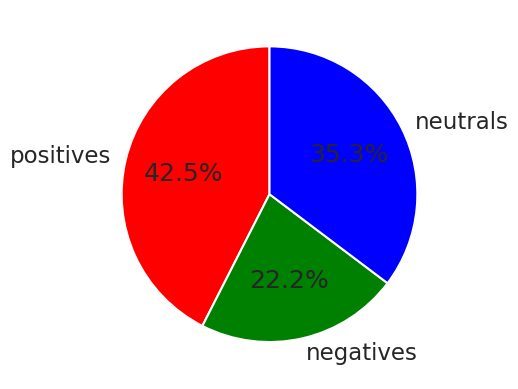

In [ ]:
#import matplotlib.pyplot as plt

slices_len = [len(positives), len(negatives), len(neutrals)]
category = ['Positives', 'Negatives', 'Neutrals']
colors = ['#96EFFF', '#6499E9', '#52D3D8']

plt.pie(slices_len, labels=category, colors=colors, startangle=90, autopct='%.1f%%')
plt.show()

## Data Visualization

In [ ]:
# tokenize helper function
import nltk
nltk.download('stopwords')
import string
def text_process(raw_text):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in list(raw_text) if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)

    # Now just remove any stopwords
    return [word for word in nopunc.lower().split() if word.lower() not in stopwords.words('english')]

def remove_words(word_list):
    remove = ['narendra','modi','...','“','”','’','…','modi’']
    return [w for w in word_list if w not in remove]
# -------------------------------------------
# tokenize message column and create a column for tokens
df_cmt_new = df_cmt.copy()
df_cmt_new['tokens'] = df_cmt['clean_comment'].apply(text_process) # tokenize style 1
df_cmt_new['no_modi'] = df_cmt_new['tokens'].apply(remove_words) #tokenize style 2
df_cmt_new = df_cmt_new.drop(['tokens'],axis=1)
df_cmt_new.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,Comment,clean_comment,category,no_modi
0,My family is Mormon. I have never tried to ex...,family mormon have never tried explain them t...,1,"[family, mormon, never, tried, explain, still,..."
1,Buddhism has very much a lot compatible with C...,buddhism has very much lot compatible with chr...,1,"[buddhism, much, lot, compatible, christianity..."
2,seriously: **don't say a thing**. first of al...,seriously don say thing first all they won get...,-1,"[seriously, say, thing, first, get, complex, e..."
3,"What you have learned is yours and only yours,...",what you have learned yours and only yours wha...,0,"[learned, want, teach, different, focus, goal,..."
4,"For your own benefit, you may want to read, ""L...",for your own benefit you may want read living ...,1,"[benefit, may, want, read, living, buddha, liv..."


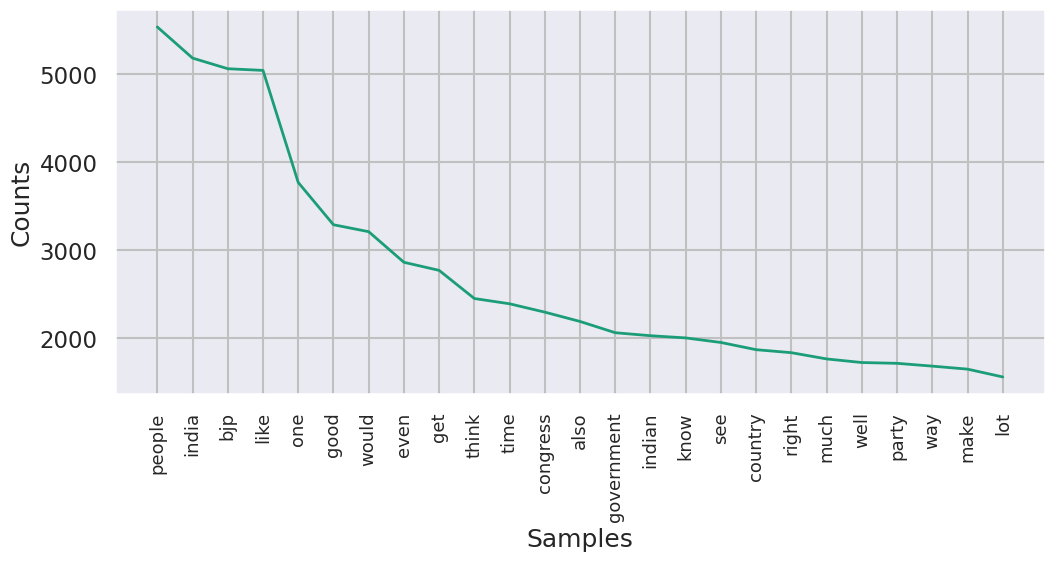

Text(0.5, 0, 'Word Rank')

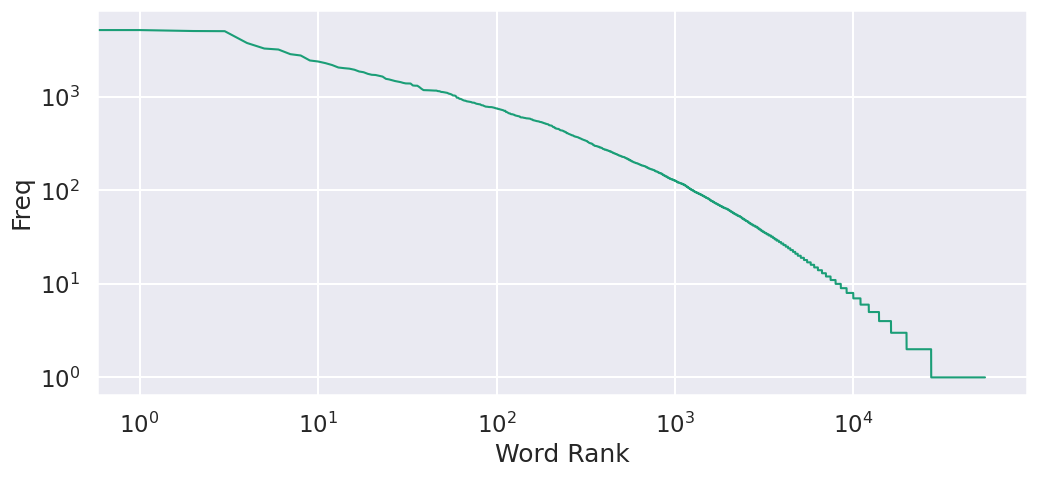

In [ ]:
# plot word frequency distribution of first few words without narendra, modi
# no_modi
no_modi = []
for ls in df_cmt_new['no_modi']:
    words = [w for w in ls]
    for word in words:
        no_modi.append(word)
plt.figure(figsize=(12,5))
plt.xticks(fontsize=13, rotation=90)
fd = nltk.FreqDist(no_modi)
fd.plot(25,cumulative=False)

# log-log  of all words -- no_modi
word_counts = sorted(Counter(no_modi).values(), reverse=True)
plt.figure(figsize=(12,5))
plt.loglog(word_counts, linestyle='-', linewidth=1.5)
plt.ylabel("Freq")
plt.xlabel("Word Rank")

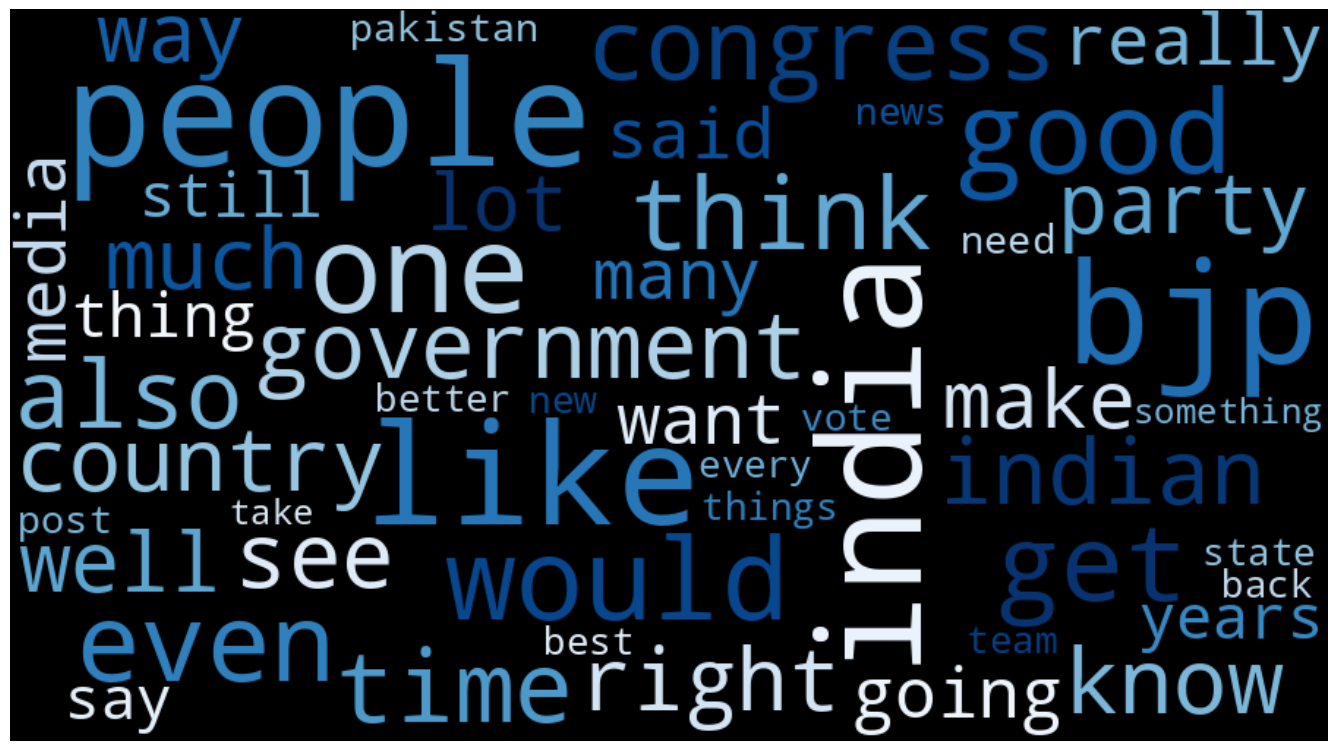

In [ ]:
# split sentences to get individual words
all_words = []

for line in df_cmt_new['no_modi']: # try 'tokens'
    all_words.extend(line)

# create a word frequency dictionary
wordfreq = Counter(all_words)
# draw a Word Cloud with word frequencies
wordcloud = WordCloud(width=900,
                      height=500,
                      max_words=50,
                      max_font_size=100,
                      relative_scaling=0.5,
                      colormap='Blues',
                      normalize_plurals=True).generate_from_frequencies(wordfreq)
plt.figure(figsize=(17,14))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Cleaned data

In [ ]:
dataset = df_cmt_new.filter(['clean_comment','category'], axis=1)
dataset.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37249 entries, 0 to 37248
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_comment  37249 non-null  object
 1   category       37249 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 582.1+ KB


In [ ]:
dataset.to_csv('redt_dataset.csv', index = False, sep=",", encoding="utf-8")